## VTK File Opener

#### This is to open VTK files that IBM makes and analyzing them

In [1]:
### Import a bunch of crap

import os
import sys
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300



In [2]:
### Non-Changing Parameters

Nx = 256 # Number of points along x-axis - Does not count end point
Ny = 160 # Number of points along y-axis - Does not count end point
N_channel = 128 # 160*0.8

In [3]:
### Domain Parameters

Lx = 2.5
Ly = 1.25
width = Ly*0.8

Tfinal = 2.5
dt = 5.0e-5 
print_every = 500

uMax = 25.0
mu = 0.002



reynolds_folder = 'Flow_Past_Disk_High_Reynolds_1'

num_files = int(Tfinal/dt/print_every)

u = np.zeros((Ny,Nx,num_files))
v = np.zeros((Ny,Nx,num_files))

In [4]:
modify = False

### Modify vtk files to remove first 12 lines
if modify:
    for jj in range(0,num_files):
        index = '0' + str(jj)
        with open('C:/Users/Kevin/Documents/pytorch-stokes/vtk_files/' + reynolds_folder + '/u.00' + index[-2:] +'.vtk', 'r') as f:
            contents = f.readlines()
            contents = contents[12:]
            with open('C:/Users/Kevin/Documents/pytorch-stokes/vtk_files/' + reynolds_folder + '/vel.00' + index[-2:] +'.vtk', 'a') as g:
                for kk in range(len(contents)):
                    g.write(contents[kk])

In [6]:
### Make Velocity

for ii in range(0,num_files):
    index = '0' + str(ii)
    data = np.loadtxt('C:/Users/Kevin/Documents/pytorch-stokes/vtk_files/' + reynolds_folder + '/vel.00' + index[-2:] +'.vtk')

    data = data.reshape(-1).reshape((Nx*Ny,3))
    u[:,:,ii] = data[:,0].reshape(Ny,Nx)
    v[:,:,ii] = data[:,1].reshape(Ny,Nx)

u = u[16:N_channel + 16 + 1,:,:]
v = v[16:N_channel + 16 + 1,:,:]

u = np.concatenate( (u, u[:,0,None,:]), axis=1)
v = np.concatenate( (v, v[:,0,None,:]), axis=1)

In [7]:
### Check Steady State
###     by comparing last two velocities L2 and Linf error

u_final = u[:,:,-1]
u_penult = u[:,:,-2]

v_final = v[:,:,-1]
v_penult = v[:,:,-2]

Square_diff = (u_final - u_penult)**2 + (v_final - v_penult)**2

### Trapezoidal Rule

Pre_integral = (Square_diff[1:,:] + Square_diff[:-1,:])/2
Pre_integral = (Pre_integral[:,1:] + Pre_integral[:,:-1])/2

L2_error = np.sqrt( np.sum(Pre_integral)*(Lx/Nx)*(Ly/Ny) )
Linf_error = np.max(np.sqrt(Square_diff))

print(L2_error)
print(Linf_error)

0.013019102910465829
0.19925370874841955


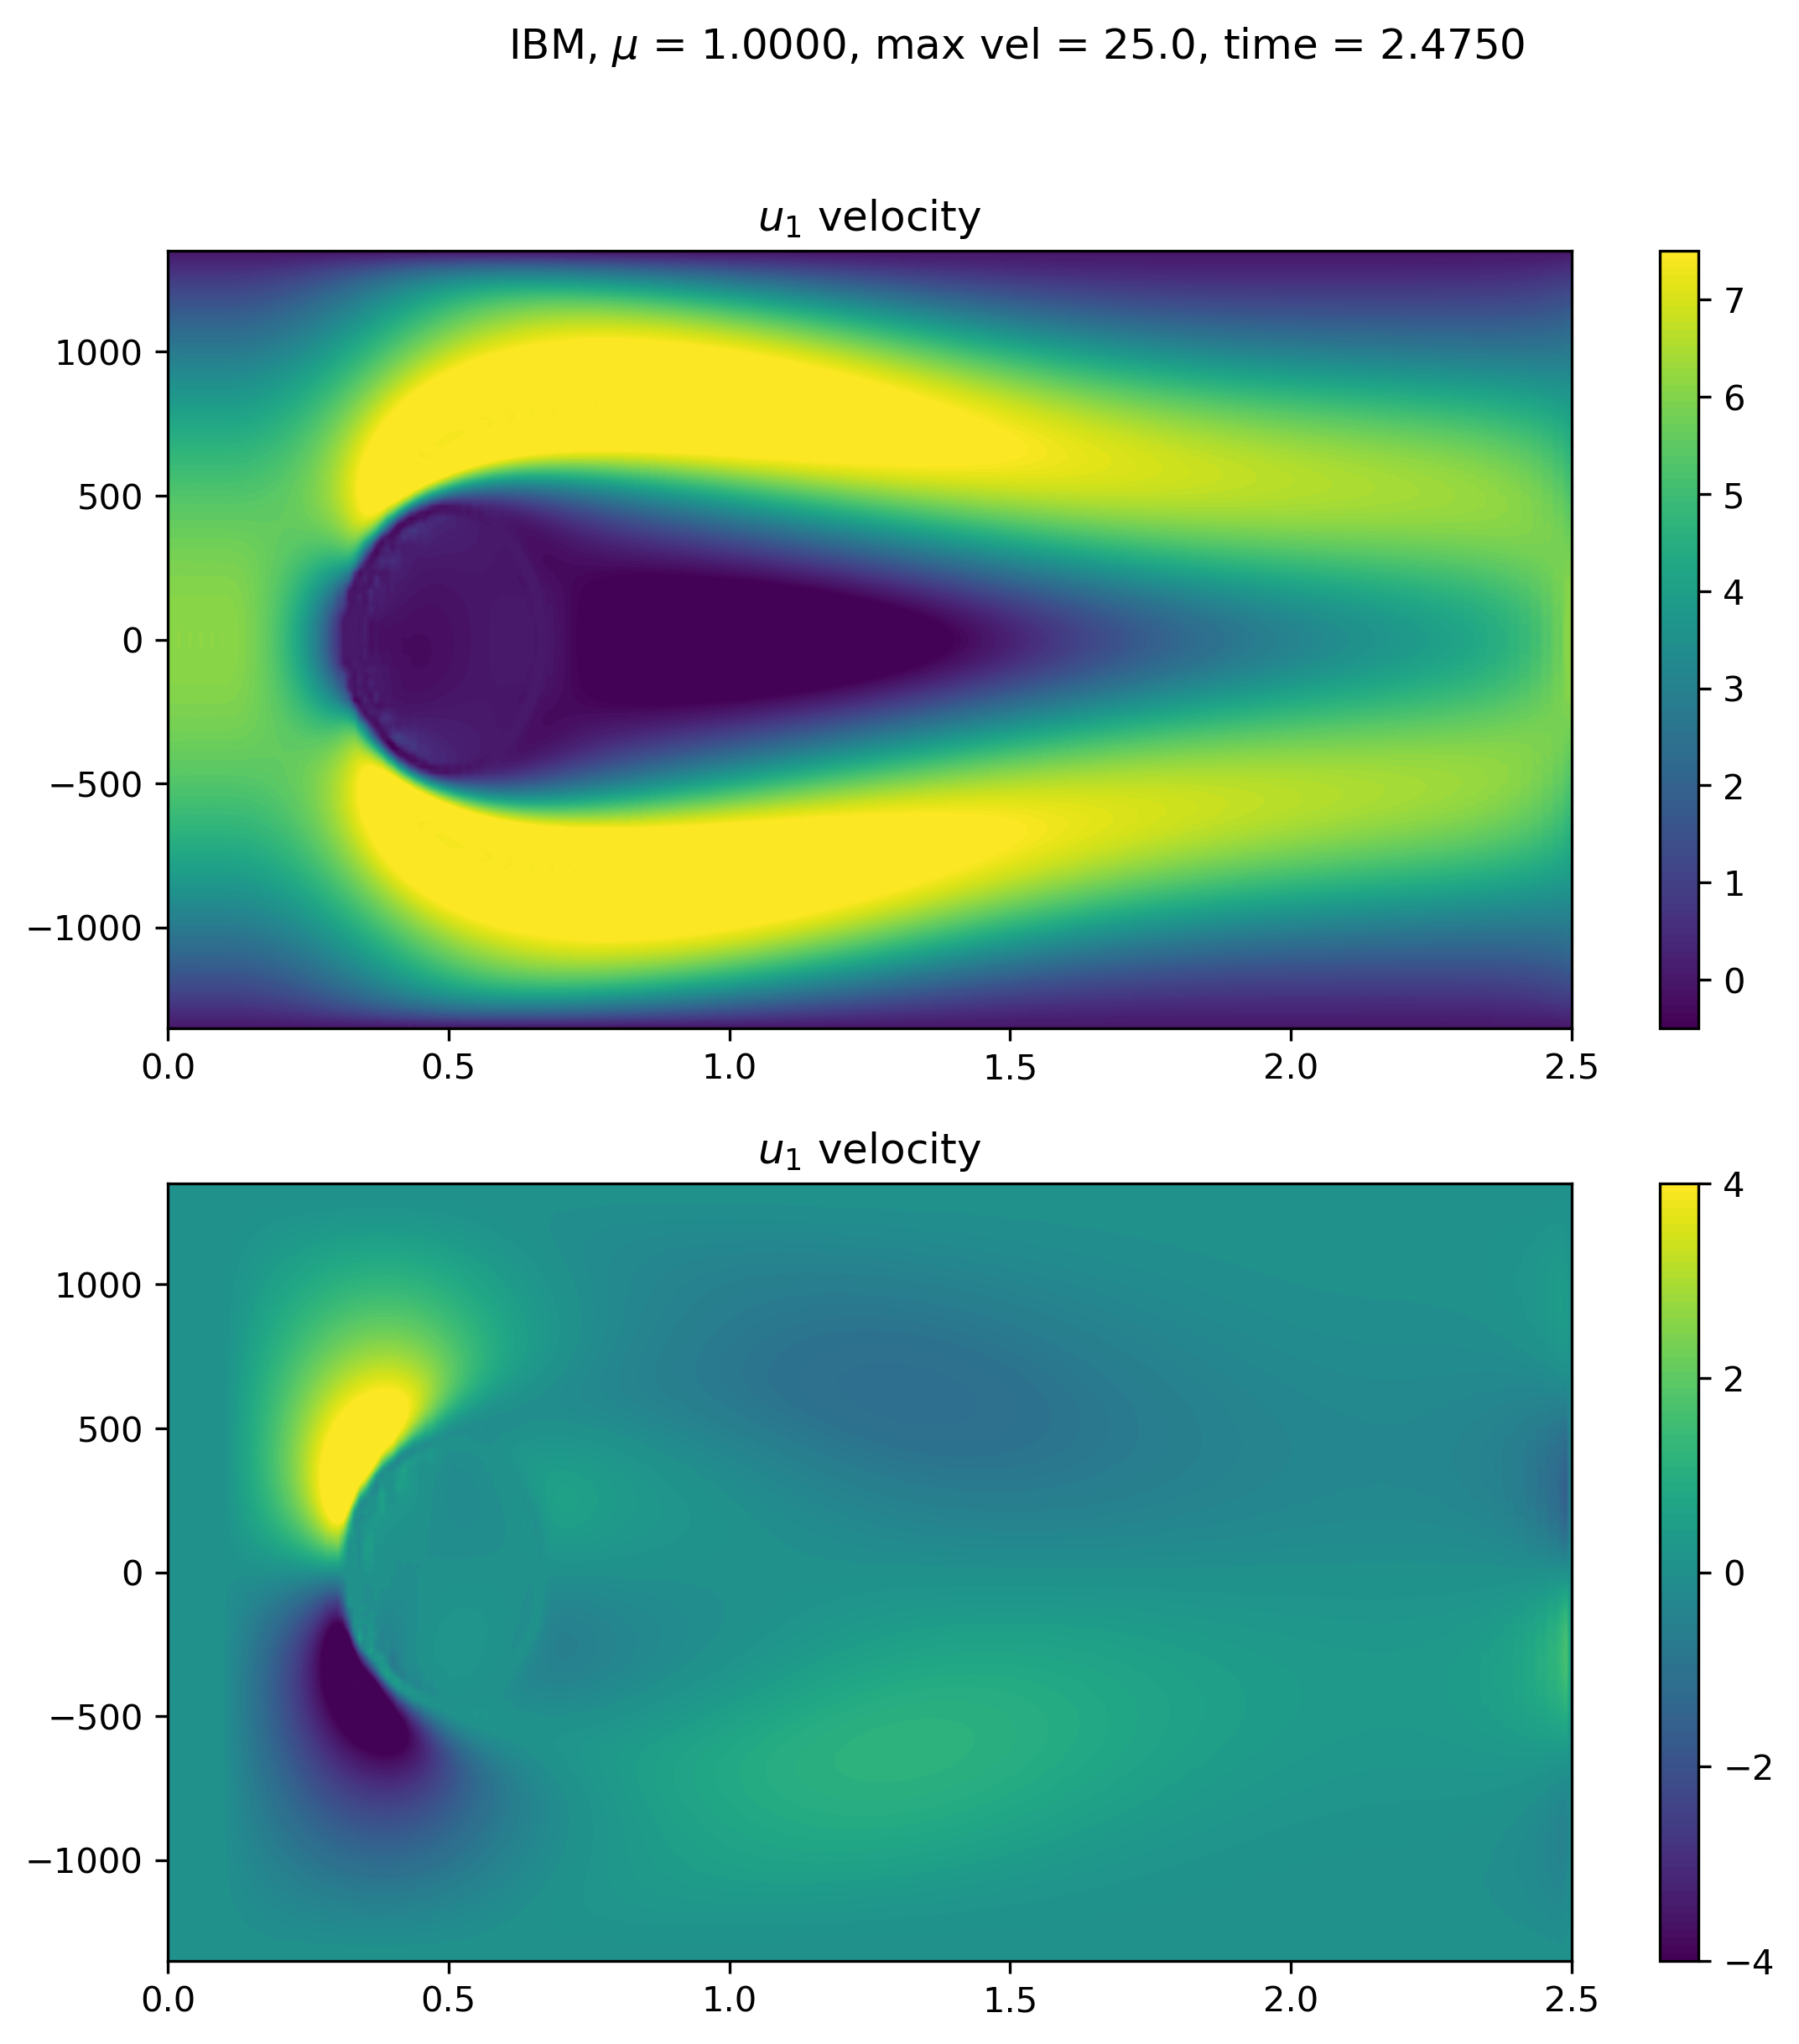

In [21]:

### Plotting Parameters

imagesfolder = "images/"
imagefilename = 'IBM_'  + reynolds_folder

x1plot, x2plot = np.meshgrid(np.linspace(0,Lx,Nx+1), np.linspace(-width/2, width/2,N_channel + 1))

circle_plot = np.linspace(0,2*math.pi, 30)
x_circle = width/6*np.cos(circle_plot) + width/2
y_circle = width/6*np.sin(circle_plot)

max_u_vel = np.amax(u)
min_u_vel = np.amin(u)
max_v_vel = np.amax(v)
min_v_vel = np.amin(v)

levels_flow_1 = np.linspace(-0.5, 7.5, 100)
levels_tick_1 = np.linspace(0, 7, 8)

levels_flow_2 = np.linspace(-4, 4, 100)
levels_tick_2 = [-4.0, -2.0, 0, 2.0, 4.0]

### Make figures
plt.close('all')
fig = plt.figure(figsize=(9,9))

fig.suptitle('IBM, ' + r'$\mu$ = {:.4f}'.format(mu) + ', max vel = {:.1f}'.format(uMax))

ax0 = fig.add_subplot(2,1,1)
contour0 = ax0.contourf(x1plot, x2plot, u[:,:,0], levels_flow_1, cmap=plt.cm.viridis)
ax0.set_title(r'$u_1$ velocity')
plt.colorbar(contour0, ticks =levels_tick_1, ax=ax0)

ax1 = fig.add_subplot(2,1,2)
contour1 = ax1.contourf(x1plot, x2plot, v[:,:,0], levels_flow_2, cmap=plt.cm.viridis)
ax1.set_title(r'$u_1$ velocity')
plt.colorbar(contour1, ticks =levels_tick_2, ax=ax1)

for ii in range(0,num_files):
    
    fig.suptitle('IBM, ' + r'$\mu$ = {:.4f}'.format(mu) + ', max vel = {:.1f}'.format(uMax) + ', time = {:.4f}'.format(ii*print_every*dt))
    
    ax0.contourf(x1plot, x2plot, u[:,:,ii], levels_flow_1, cmap=plt.cm.viridis)
    ax1.contourf(x1plot, x2plot, v[:,:,ii], levels_flow_2, cmap=plt.cm.viridis)  
    
    filename = imagesfolder + 'IBM' + str(ii)
    if os.path.isfile(filename):
        os.remove(filename)
    fig.savefig(filename, facecolor='w', transparent=False)